In [41]:
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import uuid

from dotenv import load_dotenv
from datasets import load_dataset

In [42]:
load_dotenv()

HUGGING_FACE_RAW_DATASET = "jkbkaiser/thesis-gbif-raw"
HUGGING_FACE_PROCESSED_DATASET = "jkbkaiser/thesis-gbif-hier"
GOOGLE_BUCKET_URL = os.getenv('GOOGLE_BUCKET_URL')

In [43]:
ds = load_dataset(HUGGING_FACE_PROCESSED_DATASET)
ds = ds.with_format("numpy")
train = ds["train"][:]
valid = ds["valid"][:]
test = ds["test"][:]

In [44]:
ruuid = uuid.uuid4()

mappings = requests.get(f"{GOOGLE_BUCKET_URL}/mappings_per_level.json?id={ruuid}").json()
id2genus = mappings["id2genus"]
id2species = mappings["id2species"]

In [45]:
genus = np.concat((train["genus"], valid["genus"], test["genus"]))
species = np.concat((train["species"], valid["species"], test["species"]))

# Genus

In [57]:
uniq, counts = np.unique(genus, return_counts=True)
print(len(uniq))

print(len(id2genus))
print(np.argmax(counts))

label = uniq[np.argmax(counts)]
id2genus[str(label)]

180
180
84


'carabus'

In [47]:
more1 = np.sum(counts > 1)
more5 = np.sum(counts > 5)
more10 = np.sum(counts > 10)
more25 = np.sum(counts > 25)
more50 = np.sum(counts > 50)
more100 = np.sum(counts > 100)

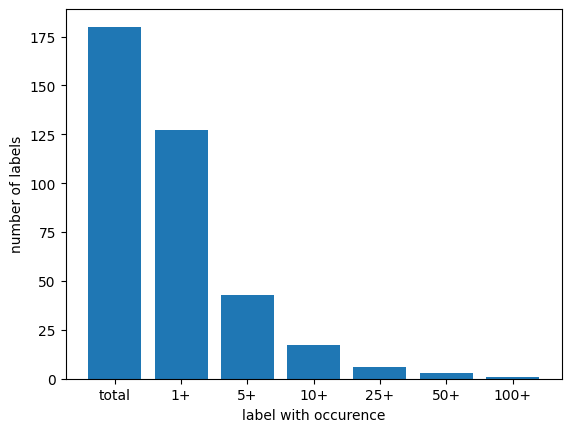

In [48]:
plt.bar(("total", "1+", "5+", "10+", "25+", "50+", "100+"), height=(len(uniq), more1, more5, more10, more25, more50, more100))
plt.xlabel("label with occurence")
plt.ylabel("number of labels")
plt.show()

In [49]:
more1 = np.sum(counts[counts > 1])
more5 = np.sum(counts[counts > 5])
more10 = np.sum(counts[counts > 10])
more25 = np.sum(counts[counts > 25])
more50 = np.sum(counts[counts > 50])
more100 = np.sum(counts[counts > 100])

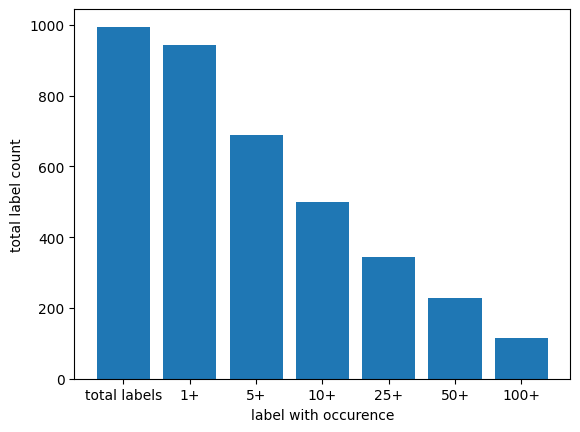

In [50]:
plt.bar(("total labels", "1+", "5+", "10+", "25+", "50+", "100+"), height=(np.sum(counts), more1, more5, more10, more25, more50, more100))
plt.xlabel("label with occurence")
plt.ylabel("total label count")
plt.show()

In [51]:
idx = (-counts).argsort()[:5]

print("Most occuring labels")
for i, label_id in enumerate(idx):
    label = uniq[label_id]
    label = id2genus[str(label)]
    print(f"{i}: {label}, count: {counts[label_id]}")

Most occuring labels
0: carabus, count: 116
1: calosoma, count: 59
2: lucanus, count: 54
3: oedemera, count: 46
4: cicindela, count: 43


# Species

In [52]:
uniq, counts = np.unique(species, return_counts=True)

print(len(uniq))
print(len(id2species))
print(np.argmax(counts))

label = uniq[np.argmax(counts)]
id2species[str(label)]

258
258
116


'scrutator'

In [34]:
more1 = np.sum(counts > 1)
more5 = np.sum(counts > 5)
more10 = np.sum(counts > 10)
more25 = np.sum(counts > 25)
more50 = np.sum(counts > 50)
more100 = np.sum(counts > 100)

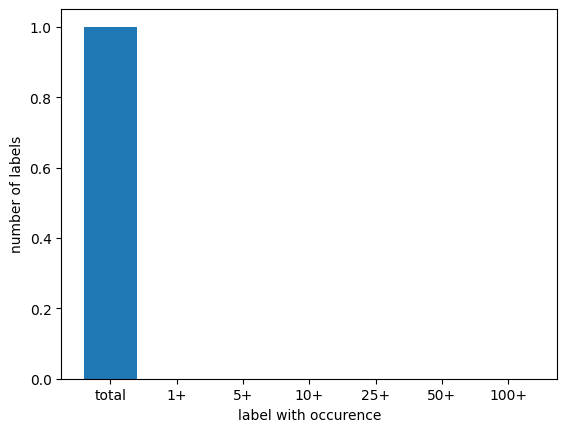

In [35]:
plt.bar(("total", "1+", "5+", "10+", "25+", "50+", "100+"), height=(len(uniq), more1, more5, more10, more25, more50, more100))
plt.xlabel("label with occurence")
plt.ylabel("number of labels")
plt.show()

In [36]:
more1 = np.sum(counts[counts > 1])
more5 = np.sum(counts[counts > 5])
more10 = np.sum(counts[counts > 10])
more25 = np.sum(counts[counts > 25])
more50 = np.sum(counts[counts > 50])
more100 = np.sum(counts[counts > 100])

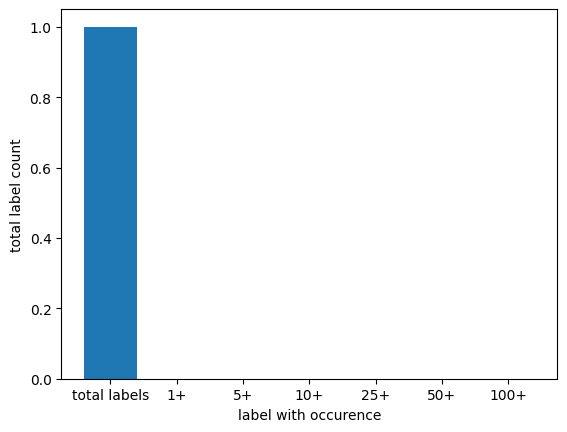

In [37]:
plt.bar(("total labels", "1+", "5+", "10+", "25+", "50+", "100+"), height=(np.sum(counts), more1, more5, more10, more25, more50, more100))
plt.xlabel("label with occurence")
plt.ylabel("total label count")
plt.show()

In [38]:
idx = (-counts).argsort()[:5]

print("Most occuring labels")
for i, label_id in enumerate(idx):
    label = uniq[label_id]
    label = id2species[str(label)]
    print(f"{i}: {label}, count: {counts[label_id]}")

Most occuring labels
0: munda, count: 1


# Combination

In [39]:
combinations = list(zip(genus, species))
unique = list(set(combinations))
counts = {}

for combi in list(combinations):
    if combi in counts:
        counts[combi]+=1
    else:
        counts[combi]=0

uniq, counts = list(counts.keys()), np.array(list(counts.values()))

TypeError: 'numpy.int64' object is not iterable

In [40]:
idx = (-counts).argsort()[:5]

print("Most occuring labels")
for i, label_idx in enumerate(idx):
    (genus, species) = uniq[label_idx]

    genus_s = id2genus[str(genus)]
    species_s = id2species[str(species)]
    print(f"{i}: genus - {genus_s} {genus} species - {species_s} {species}, count: {counts[label_idx]}")

Most occuring labels


TypeError: cannot unpack non-iterable numpy.int64 object

In [28]:
first = np.where(train["genus"] == 37)[0][0]
print(first)

18


In [31]:
t = train["image"][first]

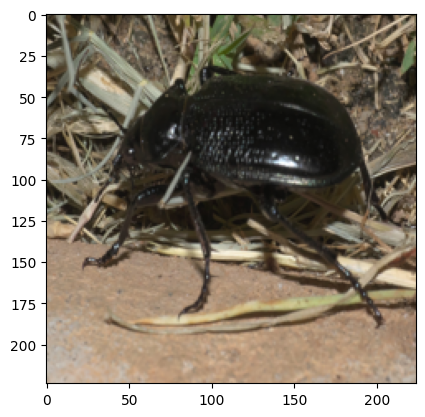

In [32]:
plt.imshow(t)